<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Hidden_Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [825]:
!pip install hmmlearn
!pip install yfinance

In [826]:
from hmmlearn import hmm
import yfinance as yf

In [938]:
df = yf.download('^nsei',start='2015-01-01')#period='max'
#median = df.loc[df['Close']<10, 'Close'].median()
#df["Close"] = np.where(df["Close"] <10, df.Close.mean(),df['Close'])


[*********************100%***********************]  1 of 1 completed


In [939]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [940]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900


In [941]:
returns = np.log(df['Close']).diff(8)

In [942]:
returns.dropna(inplace=True)

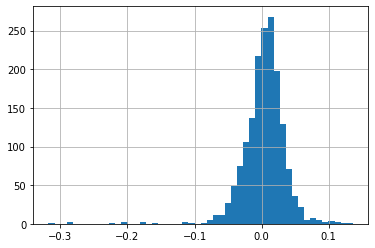

In [943]:
returns.hist(bins=50);

In [944]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [945]:
#retu = np.column_stack([returns]) =====> returns.to_numpy().reshape(-1, 1)


In [946]:
X = returns.to_numpy().reshape(-1, 1)
print(X.shape)
model.fit(X)

(1657, 1)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=2, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [947]:
Z = model.predict(X)

In [948]:
Z

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

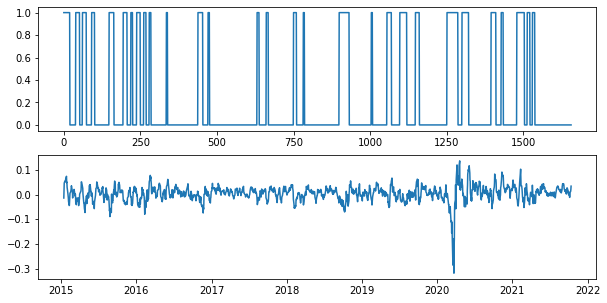

In [949]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

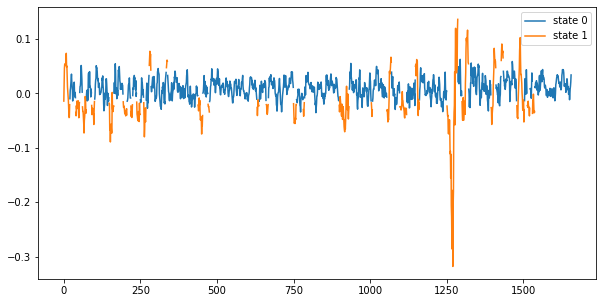

In [950]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

In [951]:
# transition matrix
model.transmat_

array([[0.96416989, 0.03583011],
       [0.09874688, 0.90125312]])

In [952]:
'''
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.999, 0.001],
  [0.001, 0.999],                           
])
'''

'\n# try to set the transition matrix intuitively\nmodel.transmat_ = np.array([\n  [0.999, 0.001],\n  [0.001, 0.999],                           \n])\n'

In [953]:
returns[Z==0].mean()

0.010073024973682702

In [954]:
returns[Z==1].mean()

-0.017557384740569205

In [955]:
zero=(returns[Z==0]).mean()

In [956]:
one=(returns[Z==1]).mean()

In [957]:
print(f'zero {zero}')
print(f'one {one}')

zero 0.010073024973682702
one -0.017557384740569205


In [958]:
# run inference again
Z = model.predict(X)
# first create arrays with nan
returns_vol = np.empty(len(Z))
returns_vol[:] = np.nan
if one>0:
  returns_vol[Z==0]=1
  returns_vol[Z==1]=0
elif one<0:
  returns_vol[Z==0]=0
  returns_vol[Z==1]=1
ret=returns.reset_index()
zi= pd.concat([ret.Date,ret.Close,pd.Series(Z),pd.Series(returns_vol)],axis=1)
zi=zi.set_index('Date')
zi.columns=['pct_chg','pred','Volatility']



In [959]:
#print(abcd)

In [960]:
zi.to_csv('daa.csv')

In [961]:
def plot_buy_sell_signal(df):
  reg1=[]
  reg2=[]
  for i in range(len(df)):
    if df.Volatility.iloc[i]==1 and df.Volatility.iloc[i-1]==0 :
      reg1.append(i)
    elif df.Volatility.iloc[i]==0 and df.Volatility.iloc[i-1]==1 :
      reg2.append(i)
  
  return reg1,reg2

In [962]:
sell,buy=plot_buy_sell_signal(zi)

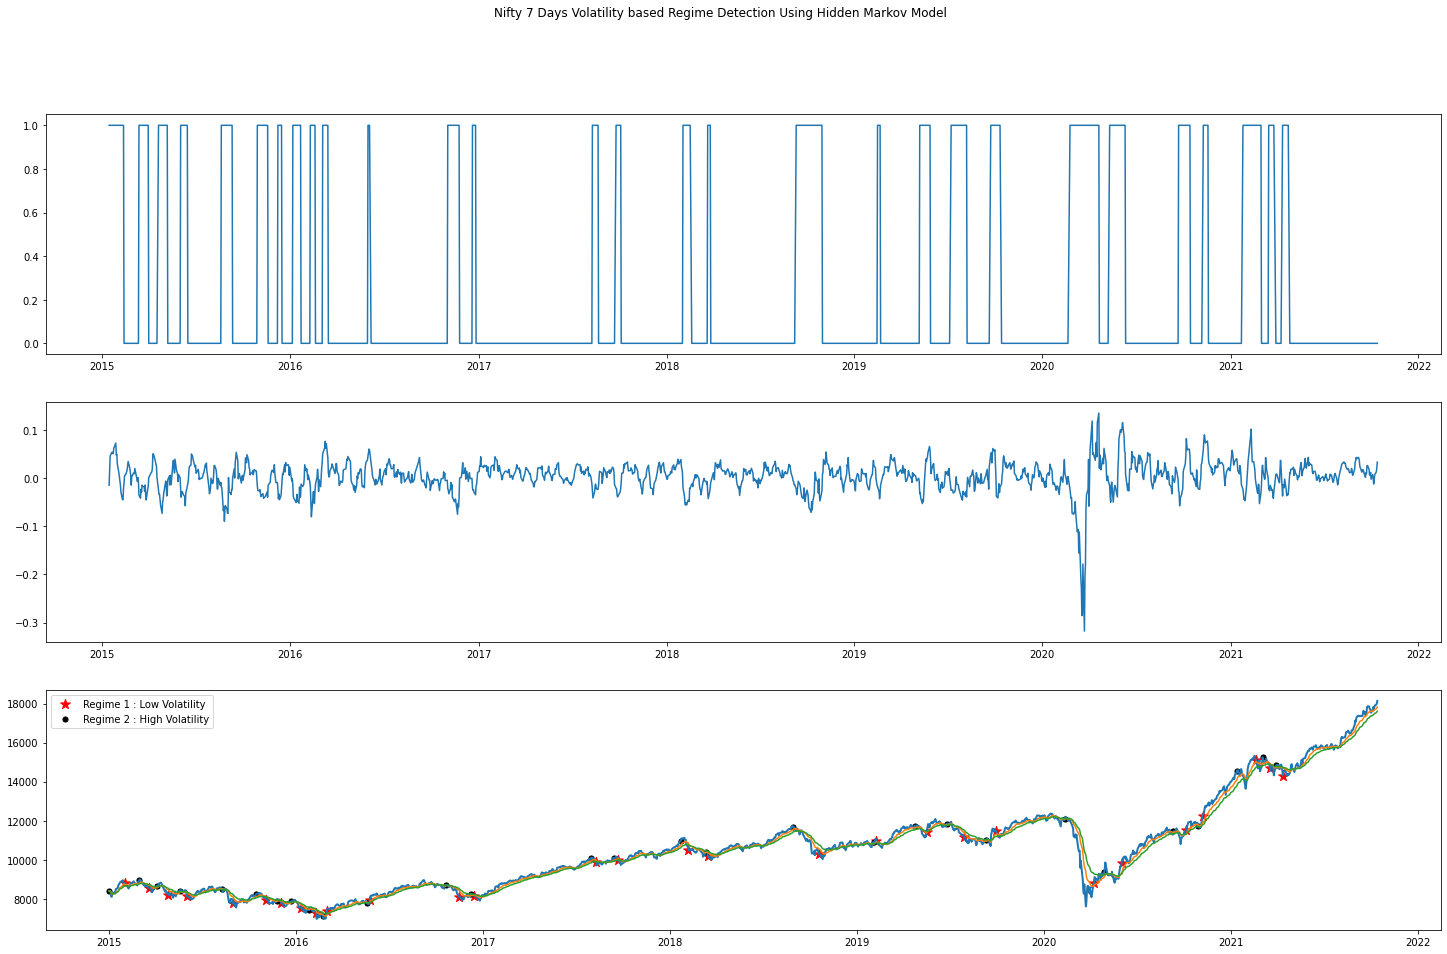

In [963]:
fig, ax = plt.subplots(figsize=(25,15),sharex=True)
plt.subplot(311)
plt.plot(zi.Volatility[:])
plt.subplot(312)
plt.plot(returns[:])
plt.subplot(313)
plt.plot(df['Close'][:],linewidth=2)
plt.plot(df["Close"].ewm(span=13).mean())
plt.plot(df["Close"].ewm(span=26).mean())
plt.scatter(df.iloc[buy][:].index,df.iloc[buy][:].Close,marker='*',s=105,color='r',label='Regime 1 : Low Volatility')
plt.scatter(df.iloc[sell][:].index,df.iloc[sell][:].Close,marker='.',s=105,color='black',label='Regime 2 : High Volatility')
plt.legend()
plt.suptitle('Nifty 7 Days Volatility based Regime Detection Using Hidden Markov Model')
plt.show();

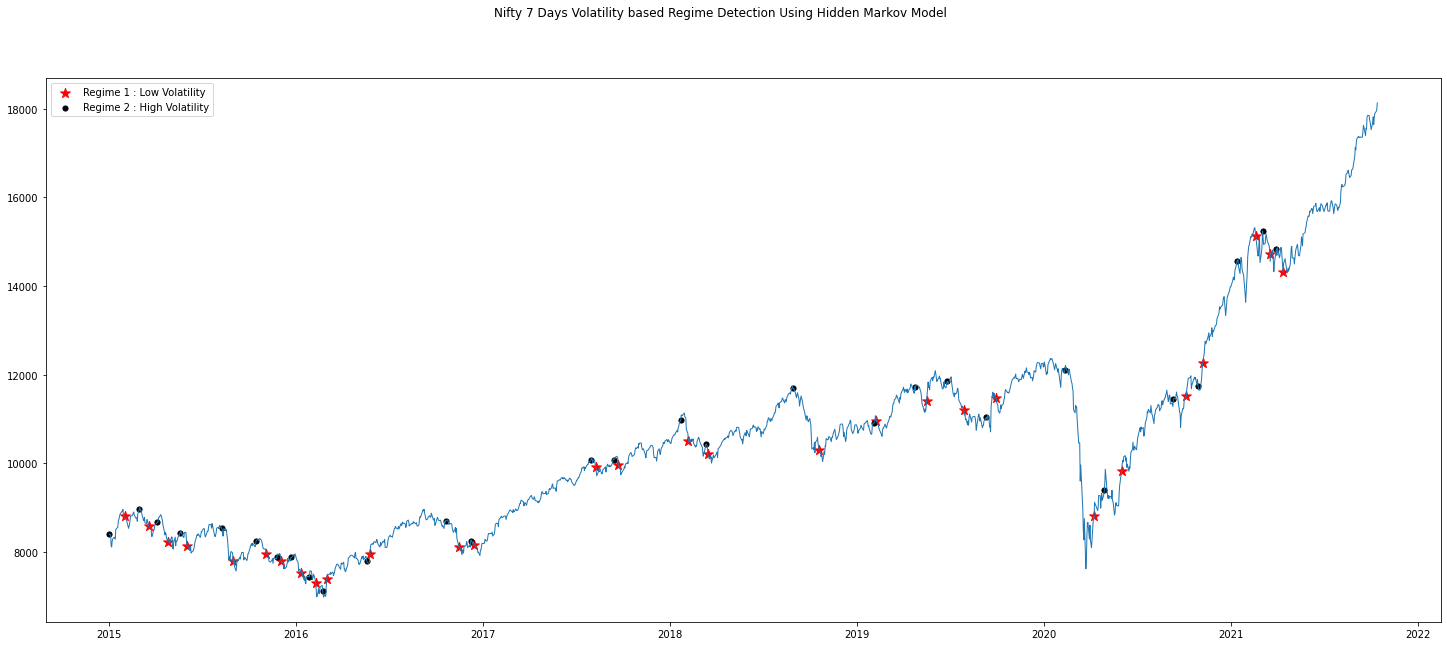

In [964]:
fig, ax = plt.subplots(figsize=(25,10),sharex=True)
plt.plot(df['Close'][:],linewidth=1)
#plt.plot(df["Close"].ewm(span=13).mean(),color='g')
#plt.plot(df["Close"].ewm(span=26).mean(),color='r')
plt.scatter(df.iloc[buy][:].index,df.iloc[buy][:].Close,marker='*',s=105,color='r',label='Regime 1 : Low Volatility')
plt.scatter(df.iloc[sell][:].index,df.iloc[sell][:].Close,marker='.',s=105,color='black',label='Regime 2 : High Volatility')
plt.legend()
plt.suptitle('Nifty 7 Days Volatility based Regime Detection Using Hidden Markov Model')
plt.show();

In [965]:
buy[-1],sell[-1]

(1538, 1530)

In [966]:
lst=[buy[-1],sell[-1]]
max(lst)

1538

In [967]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-12,17915.800781,18008.650391,17864.949219,17991.949219,17991.949219,355600
2021-10-13,18097.849609,18143.800781,18050.750000,18136.949219,18136.949219,0


In [968]:
'''
if High_vol=0:
  df.loc[0,'Regime']='High Volatility'
if High_vol=1: 
  df.loc[0,'Regime']='High Volatility' 
'''  

"\nif High_vol=0:\n  df.loc[0,'Regime']='High Volatility'\nif High_vol=1: \n  df.loc[0,'Regime']='High Volatility' \n"

In [969]:
df=pd.concat([df,zi.Volatility],axis=1)

In [970]:
df.Volatility.value_counts()

0.0    1276
1.0     381
Name: Volatility, dtype: int64

In [971]:
if df['Volatility'][-1]!=df['Volatility'][-2]:
  print(f'Change in Regime ---> Present Regime {df["Volatility"][-1]}')
else:
  print(f'No Change in Regime We are in The Regime of : {df["Volatility"][-1]}') 


No Change in Regime We are in The Regime of : 0.0


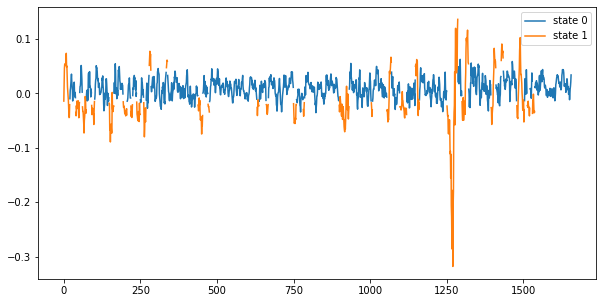

In [972]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))



# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

In [973]:
zi.head(2)

,pct_chg,pred,Volatility
Date,,,
2015-01-14,-0.014143,1,1.0
2015-01-15,0.013721,1,1.0


In [974]:
len(Z)

1657